# Torah scraping

### Looking for hidden patterns.
### and not so hidden patterns.
### 2020-4-21
### Joe Hostyk and Alex Zaloum

In [1]:
import csv
from IPython.display import display, clear_output
import os
import itertools
from collections import Counter

import matplotlib
# matplotlib.use('TKAgg')
import matplotlib.pyplot as plt

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

In [2]:
GMATRIA = {"א": 1, "ב": 2, "ג": 3, "ד": 4, "ה": 5, "ו": 6, "ז": 7, "ח": 8, "ט": 9, "י": 10, "כ": 20, "ך": 20, "ל": 30, "מ": 40, "ם": 40, "נ": 50, "ן": 50, "ס": 60, "ע": 70, "פ": 80, "ף": 80, "צ": 90, "ץ": 90, "ק": 100, "ר": 200, "ש": 300, "ת": 400}
ALEPH_BEIS = GMATRIA.keys()

In [74]:
## todo: sofit letters
## Define the otiyot categories
## Different breakdowns?

### Load texts

In [68]:
def getFileNames(folder):
    """
    Get all our file names for processing later.
    Currently, doesn't recursively search.

    Args:
        folder (str): Full path to the folder.

    Returns:
        filenames (list of strings)
    """

    print ("Getting filenames...")

    filenames = []
    for file in os.listdir(folder):
        if ".txt" in file:
            filenames.append(os.path.join(folder, file))
    return filenames

def makeWordDictionaryFromSefer(filename):
    
    seferWords = Counter()
    with open(filename, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ").replace("[", "").replace("]", "")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    seferWords[word] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return seferWords


def makeLetterDictionaryFromSefer(filename, allLetters):
    
    with open(filename, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    for letter in word:
                        allLetters[letter] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return allLetters  

def makeNgramsDictionaryFromSefer(filename, allNgrams, sizeOfngram):
    
    with open(filename, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ").replace("[", "").replace("]", "")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    for letterIndex in range(len(word) - sizeOfngram + 1):
    
                        ngram = word[letterIndex:letterIndex + sizeOfngram]
                        allNgrams[ngram] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return allNgrams  

def getAllFiles(filenames):
    
    allWords = {}
    allLetters = Counter()
    allNgrams = Counter()
    
    for filename in filenames:
        
        seferName = filename.replace(".txt", "").split("/")[-1]
        print(seferName)
#         allWords[seferName] = makeDictionaryFromSefer(filename)
#         allLetters = makeLetterDictionaryFromSefer(filename, allLetters)
        allNgrams = makeNgramsDictionaryFromSefer(filename, allNgrams, sizeOfngram = 2)

#         raise
    return allNgrams
        
        
folder = "./texts"
filenames = getFileNames(folder)
# allWords = getAllFiles(filenames)
# allLetters = getAllFiles(filenames)
allNgrams = getAllFiles(filenames)



Getting filenames...
vayikra
dvarim
breishit
shmot
bamidbar


### Check which pairs never show up in the Torah

In [69]:
allPossiblePairs = list(itertools.product(ALEPH_BEIS, ALEPH_BEIS))
allPossiblePairs = ["".join(pair) for pair in allPossiblePairs]
# allPossiblePairs

In [70]:
print([pair for pair in allPossiblePairs if pair not in allNgrams])

['בף', 'גט', 'גכ', 'גס', 'גצ', 'גץ', 'גק', 'דז', 'דט', 'דס', 'דצ', 'דץ', 'הף', 'הץ', 'זט', 'זס', 'זף', 'זצ', 'זץ', 'זש', 'חא', 'חע', 'טג', 'טז', 'טכ', 'טס', 'טצ', 'טץ', 'טק', 'כץ', 'ךא', 'ךב', 'ךג', 'ךד', 'ךה', 'ךו', 'ךז', 'ךח', 'ךט', 'ךי', 'ךכ', 'ךך', 'ךל', 'ךמ', 'ךם', 'ךנ', 'ךן', 'ךס', 'ךע', 'ךפ', 'ךף', 'ךצ', 'ךץ', 'ךק', 'ךר', 'ךש', 'ךת', 'מף', 'םא', 'םב', 'םג', 'םד', 'םה', 'םו', 'םז', 'םח', 'םט', 'םי', 'םכ', 'םך', 'םל', 'םמ', 'םם', 'םנ', 'םן', 'םס', 'םע', 'םפ', 'םף', 'םצ', 'םץ', 'םק', 'םר', 'םש', 'םת', 'ןא', 'ןב', 'ןג', 'ןד', 'ןה', 'ןו', 'ןז', 'ןח', 'ןט', 'ןי', 'ןכ', 'ןך', 'ןל', 'ןמ', 'ןם', 'ןנ', 'ןן', 'ןס', 'ןע', 'ןפ', 'ןף', 'ןצ', 'ןץ', 'ןק', 'ןר', 'ןש', 'ןת', 'סז', 'סט', 'סצ', 'סץ', 'סש', 'עח', 'עע', 'עף', 'פב', 'פפ', 'ףא', 'ףב', 'ףג', 'ףד', 'ףה', 'ףו', 'ףז', 'ףח', 'ףט', 'ףי', 'ףכ', 'ףך', 'ףל', 'ףמ', 'ףם', 'ףנ', 'ףן', 'ףס', 'ףע', 'ףפ', 'ףף', 'ףצ', 'ףץ', 'ףק', 'ףר', 'ףש', 'ףת', 'צז', 'צס', 'צש', 'ץא', 'ץב', 'ץג', 'ץד', 'ץה', 'ץו', 'ץז', 'ץח', 'ץט', 'ץי', 'ץכ', 'ץך', 'ץל', 'ץמ', 'ץם

### What are the most common pairs in the Torah?

In [71]:
allNgrams.most_common(5)

[('את', 5543), ('וי', 4352), ('אל', 4090), ('ים', 3970), ('יה', 3734)]

In [72]:
### Most common:
allNgrams.most_common(575)

### Least common:
allNgrams.most_common(575)[-30:]

[('טד', 5),
 ('סס', 5),
 ('קא', 4),
 ('כט', 4),
 ('קף', 4),
 ('זם', 4),
 ('חף', 3),
 ('א\u200d', 3),
 ('\u200dש', 3),
 ('זך', 3),
 ('שף', 3),
 ('עס', 3),
 ('זח', 3),
 ('קק', 3),
 ('אט', 3),
 ('פמ', 3),
 ('נץ', 2),
 ('תץ', 2),
 ('לץ', 2),
 ('פף', 2),
 ('זפ', 2),
 ('צץ', 2),
 ('טט', 1),
 ('אץ', 1),
 ('סן', 1),
 ('אא', 1),
 ('צט', 1),
 ('קכ', 1),
 ('הך', 1),
 ('זג', 1)]

(array([27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([    3,    70,    70,   830,  1035,  1806,  1836,  2111,  2199,
         2937,  3358,  3976,  4260,  4700,  7039,  7194,  8614,  9889,
        10630, 11270, 14474, 15605, 16357, 17965, 18147, 21583, 27069,
        28085, 30596, 31607]),
 <a list of 29 Patch objects>)

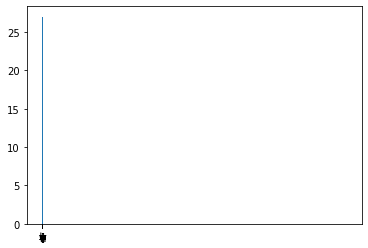

In [73]:
sortedLetters = {k: v for k, v in sorted(allLetters.items(), key=lambda item: item[1])}

plt.hist(list(sortedLetters.keys()), list(sortedLetters.values()))

### Get gmatrias:

In [4]:
def gmatrifyAword(word):
    """
    Get the gmatria for one word. Doesn't catch punctuation/errors.

    Args:
        word (str)

    Returns:
        The gmatria (int)

    """

    return sum([GMATRIA[letter] for letter in word])

# Numbers, to words with that gmatria

def getGmatrias():
    
    gmatriasToWords = {}

    directory = "./texts/"

    if not os.path.exists(directory):
        os.mkdir("./texts")
    
    pathToGmatriaFile = "{}bamidbarGmatriaByNumber.tsv".format(directory)

    if os.path.exists(pathToGmatriaFile):
        print ("Gmatria file exists. Reading...")
        reader = csv.reader(open(pathToGmatriaFile), delimiter = "\t")
        header = next(reader)
        for line in reader:
            line = dict(zip(header, line))
            word = int(line["Gmatria"])
            shifts = set(line["Word"].split(" | "))
            gmatriasToWords[word] = shifts
        print ("Finished reading.")
    ### To-do: fill this in later
#     else:
#         print ("Gmatria file does not exist. Creating...")
#         with open(pathToGmatriaFile, "w") as out:

#             out.write("Gmatria\tWord\n")

#             
    return gmatriasToWords

In [5]:
gmatriasToWords = getGmatrias()
gmatriasToWords[220]

Gmatria file exists. Reading...
Finished reading.


{'הארדי', 'וטהר', 'וידר', 'וירד', 'ורוח', 'טהור', 'יבחר', 'צפים', 'רוחו'}

### Basic histogram/breakdowns:
    
#### Letters, pairs of letters

In [ ]:
allWords
for 

### LDA: